# Part II - (Prosper Loan Data Exploration)
## by (Hanan Othman)


## Investigation Overview


> In this investigation I wanted to figure out two things:
The factors which can be used to predict default on credit.
What factors influence Prosper rating. 


## Dataset Overview

> This data set contains 113937 loans with 81 variables on each loan, for the purpose of this investigation I've taken the following variables: Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## Loan status
**Observation:**

Most of the loans in the data set are actually current loans.
Past due loans are split in several groups based on the length of payment delay.
Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount.

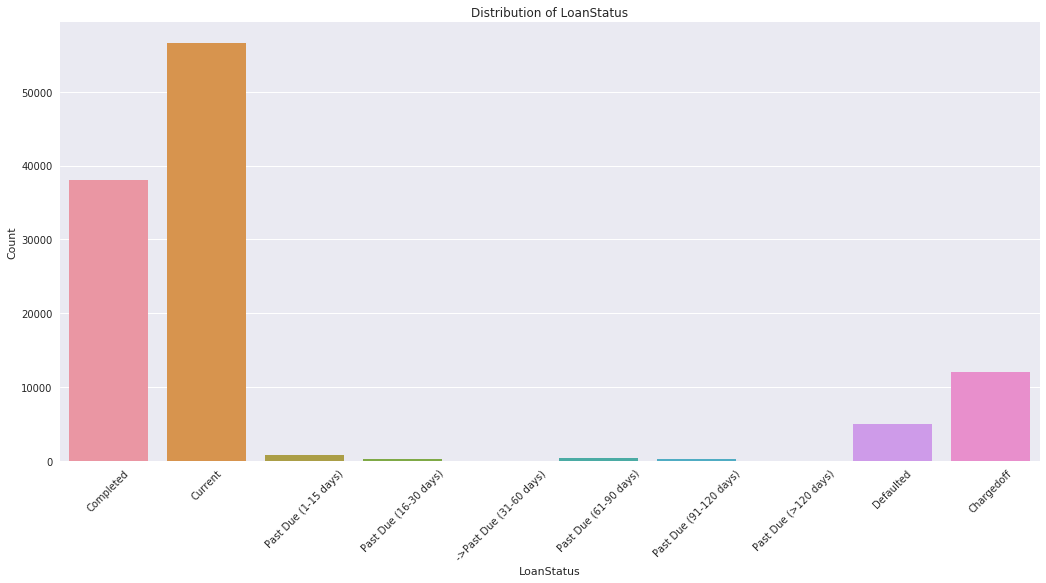

In [3]:
classes=['Completed','Current','Past Due (1-15 days)','Past Due (16-30 days)','->Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Chargedoff']
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.countplot(data = df, x = 'LoanStatus',order=classes);
plt.title('Distribution of LoanStatus')
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Employment Status
**Observation :**

The majority of borrowers are employed and all other categories as small part of borrowers.
In small Group full time has highest, after that self empolyed are there and so on.

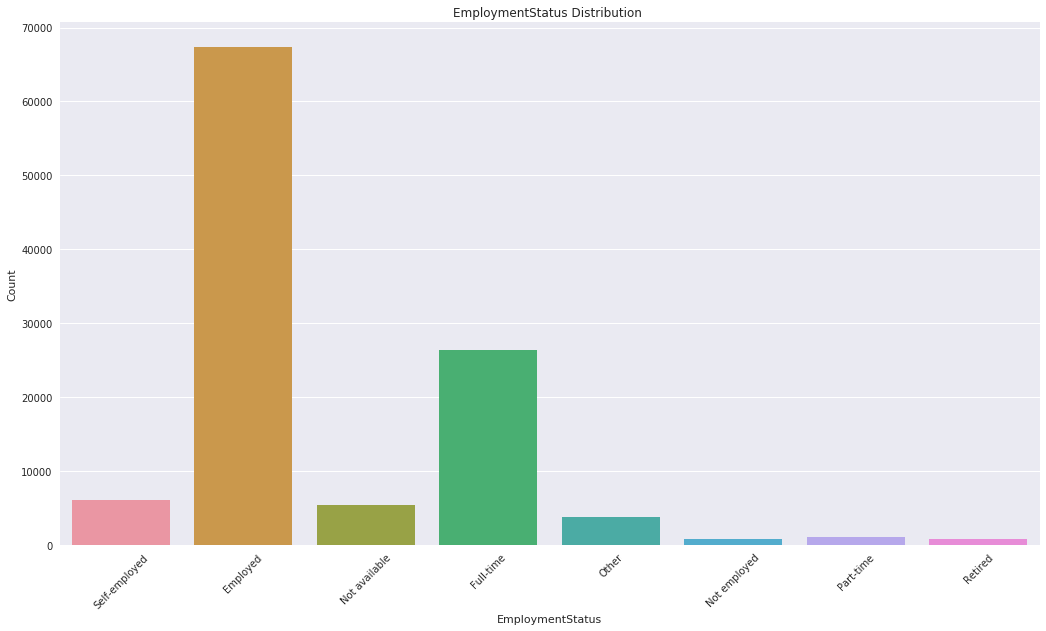

In [17]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.countplot(data = df, x = 'EmploymentStatus');
plt.title('EmploymentStatus Distribution ');
plt.xlabel('EmploymentStatus')
plt.ylabel('Count')
plt.tight_layout();
plt.xticks(rotation = 45);

### Borrower State
**Observation :**

The highest borrowers quantity is from CA (California )
and in TX , NY , FL (Texas , New York , Florida ) has almost same no. of borrowers .

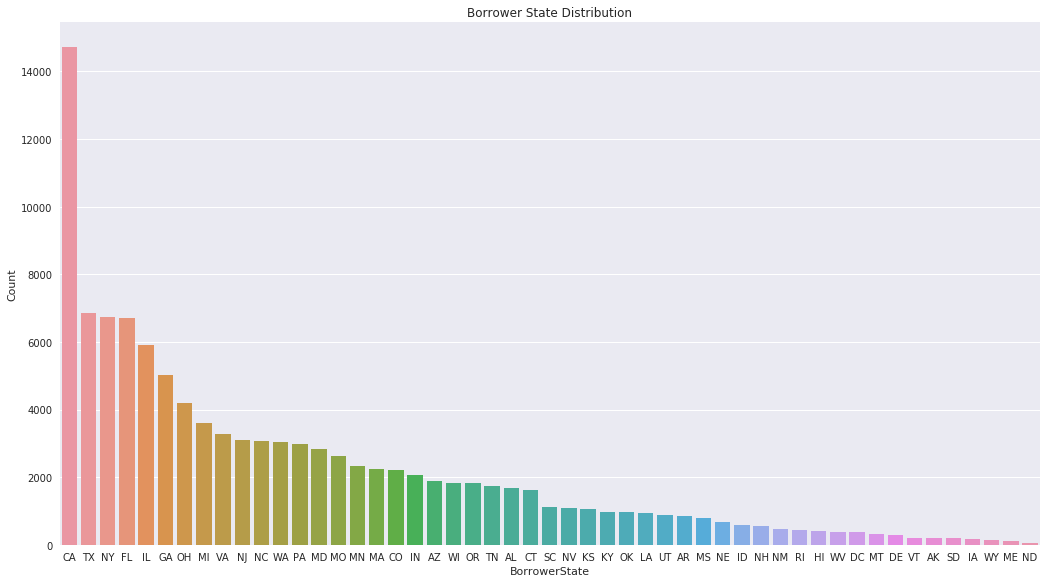

In [5]:
order = df['BorrowerState'].value_counts().index
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.countplot(data = df, x = 'BorrowerState',order=order);
plt.title('Borrower State Distribution')
plt.xlabel('BorrowerState')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Stated Monthly Income
**Observation :**

With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

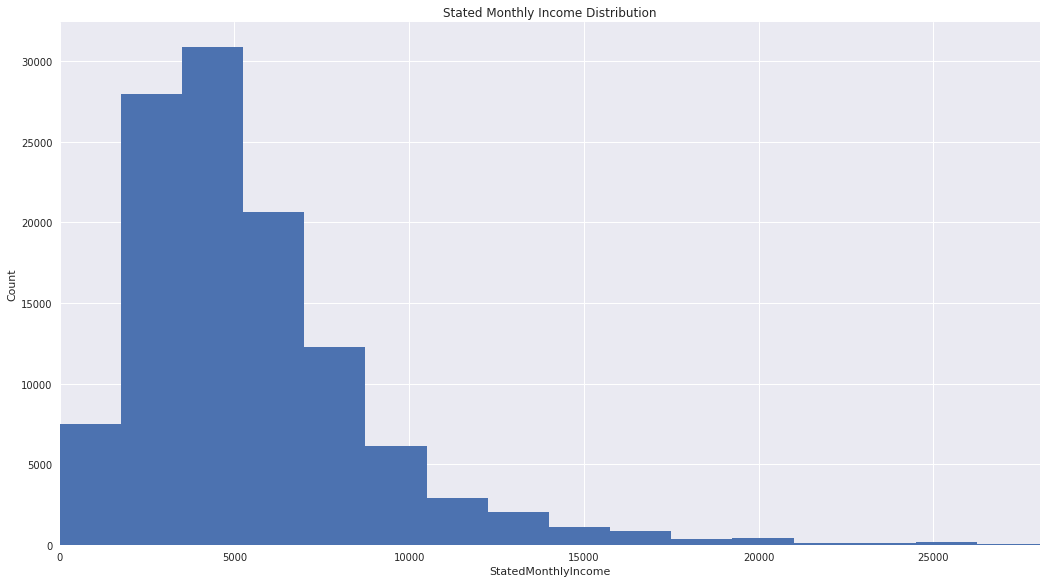

In [6]:

income_std = df['StatedMonthlyIncome'].std()
income_mean = df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
#len(target_df[target_df['StatedMonthlyIncome'] >= boundary])
sb.set(rc = {'figure.figsize':(14.70,8.27)})
plt.hist(data=df, x='StatedMonthlyIncome', bins=1000);
plt.title('Stated Monthly Income Distribution');
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.tight_layout()
plt.xlim(0, boundary);

### Credit Grade vs Monthly Loan Paymenti:
**Observation :**

The highest median of monthly paid income is of A , followed by AA and B.

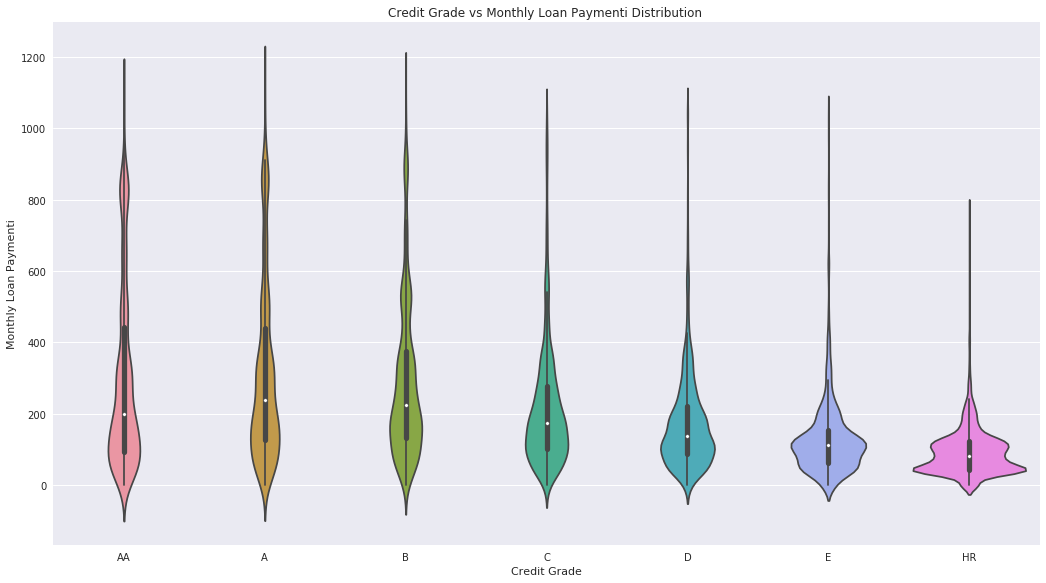

In [7]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
classes = ['AA','A','B','C','D','E','HR']
sb.violinplot(data = df, x = 'CreditGrade', y = 'MonthlyLoanPayment', order=classes);
plt.title('Credit Grade vs Monthly Loan Paymenti Distribution ')
plt.xlabel('Credit Grade')
plt.ylabel('Monthly Loan Paymenti')
plt.tight_layout()

### Employment status vs Borrower APR:
**Observation :**

In both of the Graphs the debt Consolidation have most frequency among all of them.

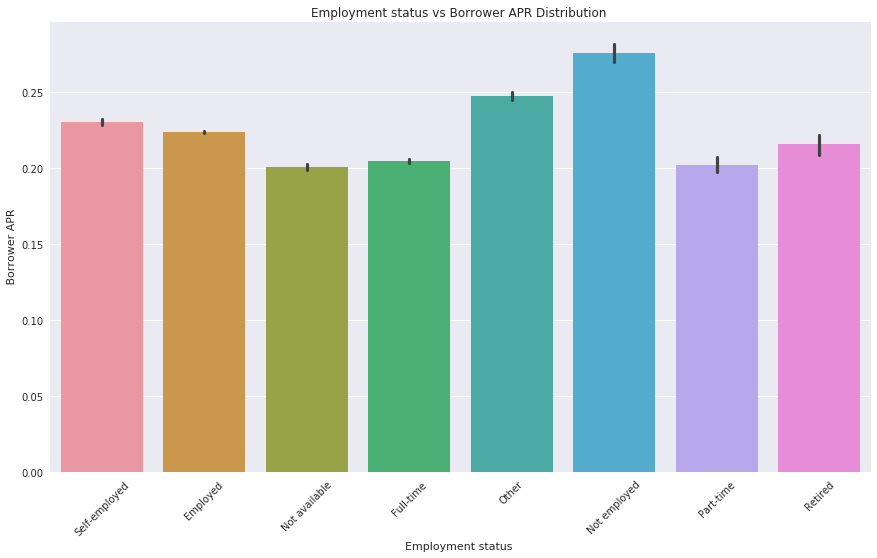

In [8]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
plt.tight_layout()
sb.barplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR' );
plt.title('Employment status vs Borrower APR Distribution ')
plt.xlabel('Employment status ')
plt.ylabel(' Borrower APR')
plt.xticks(rotation=45)
plt.show()

### Income Range vs Borrower APR
**Observation :**

The highest borrower APR are again for Non -Employed and it is followed by borrowers with income range ($1-24,999).

The lowest borrower rate is of income range ($100,000)s.

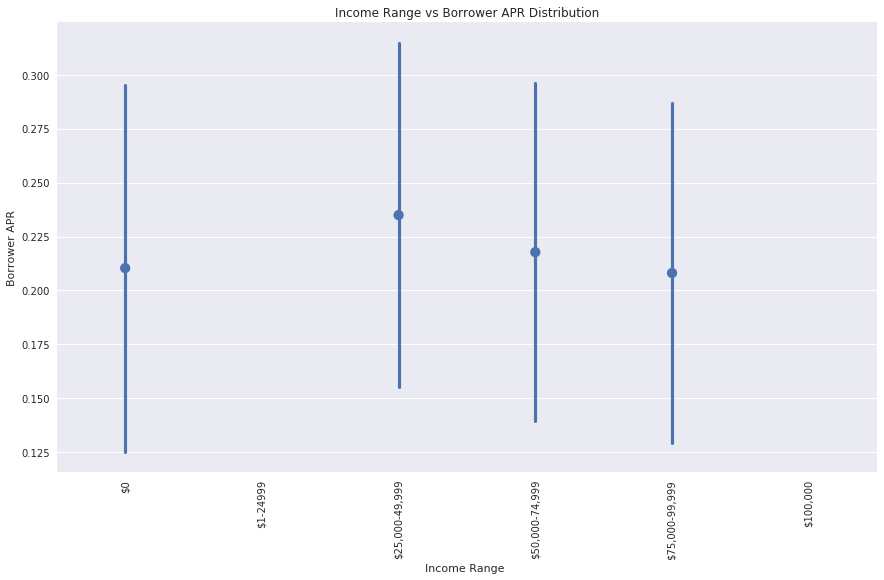

In [9]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
plt.tight_layout()
sedan_classes = ['$0','$1-24999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000']
sb.pointplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', linestyles = '' , ci = 'sd',order=sedan_classes);
plt.title('Income Range vs Borrower APR Distribution')
plt.xlabel('Income Range ')
plt.ylabel('Borrower APR')
plt.xticks(rotation=90)
plt.show()

### Borrower Rate vs Loan Status
**Observation :**

The highest borrower rate is for Currenttly Acive Loans and follwed by Completed Loans

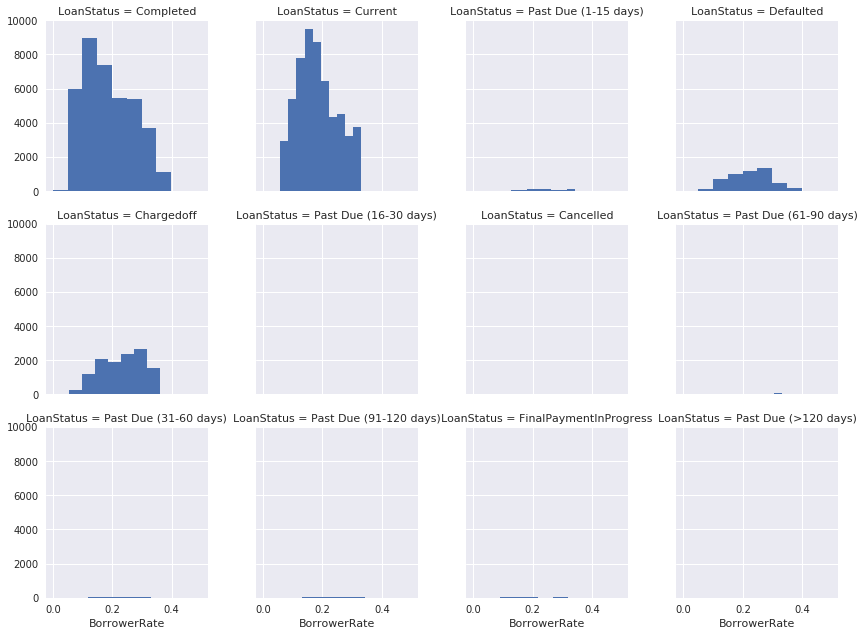

In [10]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
plt.tight_layout()
bins = np.arange(0.0 , 0.42 , 0.03)
g = sb.FacetGrid(data = df , col = 'LoanStatus' , col_wrap =4)
g.map(plt.hist , 'BorrowerRate');


### Numerical Catagory Variables
**Observation :**

LoanOriginalAmount and BorrowerAPR is having negative relationship, BorrowerAPR and LenderYield is having strong positive relationship, ProsperScore and BorrowerAPR is having Negative relationship, LoanOriginalAmount and MonthlyLoanPayment is having strong positive relationship.

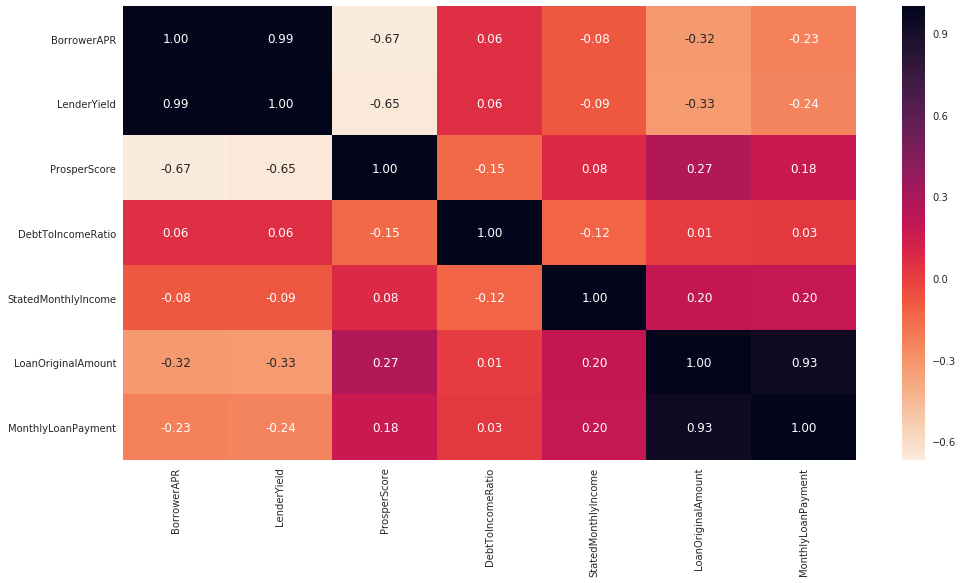

In [11]:
df_stats = ['BorrowerAPR', 'LenderYield', 'ProsperScore', 'DebtToIncomeRatio',
               'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
sb.heatmap(df[df_stats].corr() , cmap = 'rocket_r' , annot =True , fmt = '.2f');
sb.set(rc = {'figure.figsize':(14.70,8.27)})
plt.tight_layout()

In [12]:
# lets create a sample for further implementation 
np.random.seed(2018)
sample=np.random.choice(df.shape[0] , 50000 , replace=False)
df_subset = df.loc[sample]

### Employment Status and Loan Original Amount vs Loan Status :
**Observation :**

1- Completed Loan are the lowest .
2- Currently Active loans are highest .
3- Self - Employed are largest.

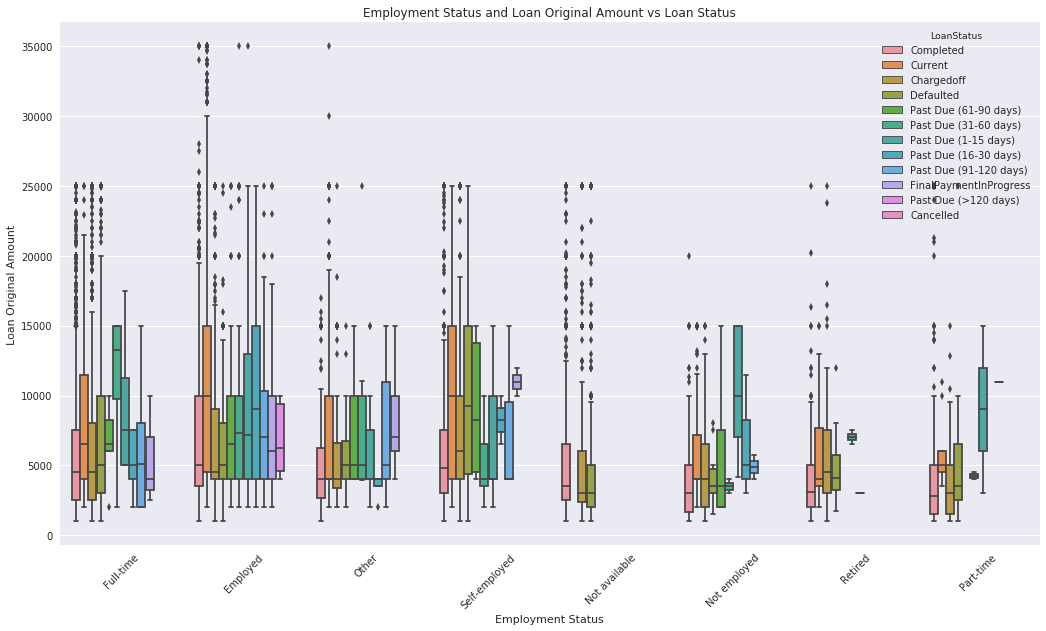

In [13]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.boxplot(data = df_subset, x = 'EmploymentStatus', 
            y = 'LoanOriginalAmount', hue = "LoanStatus");
plt.title('Employment Status and Loan Original Amount vs Loan Status');
plt.xlabel('Employment Status' )
plt.ylabel('Loan Original Amount')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

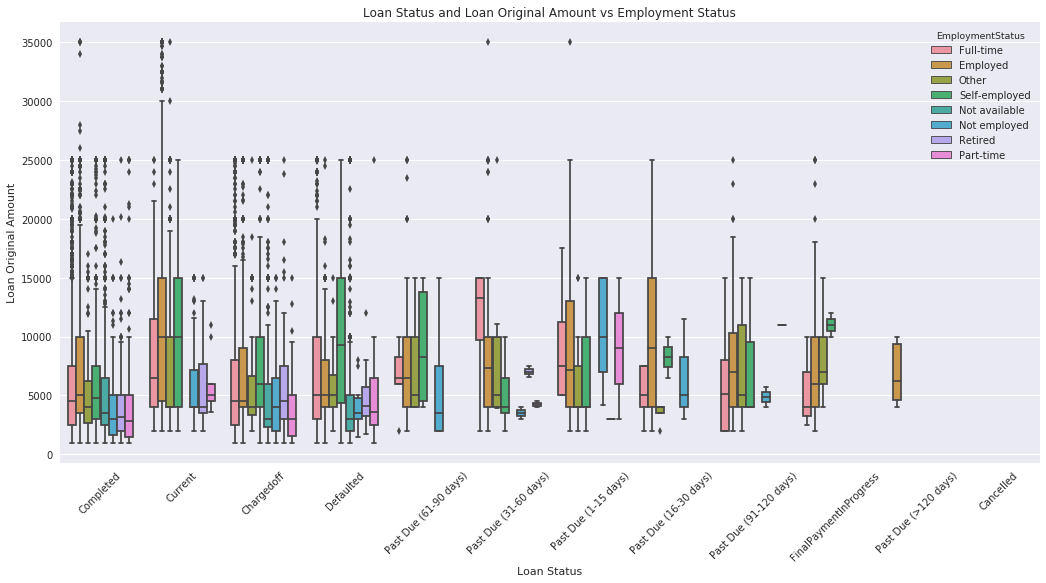

In [14]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.boxplot(data = df_subset, x = 'LoanStatus', 
            y = 'LoanOriginalAmount', hue = "EmploymentStatus");
plt.title('Loan Status and Loan Original Amount vs Employment Status');
plt.xlabel('Loan Status' )
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=45)
plt.tight_layout()

### Loan Origination Year and ListingCategory (numeric) vs Loan Status

**Observation :** Except for the lowest ratings defaulted credits tend to be larger than completed.
Most of the defaulted credits comes from individuals with low Prosper rating

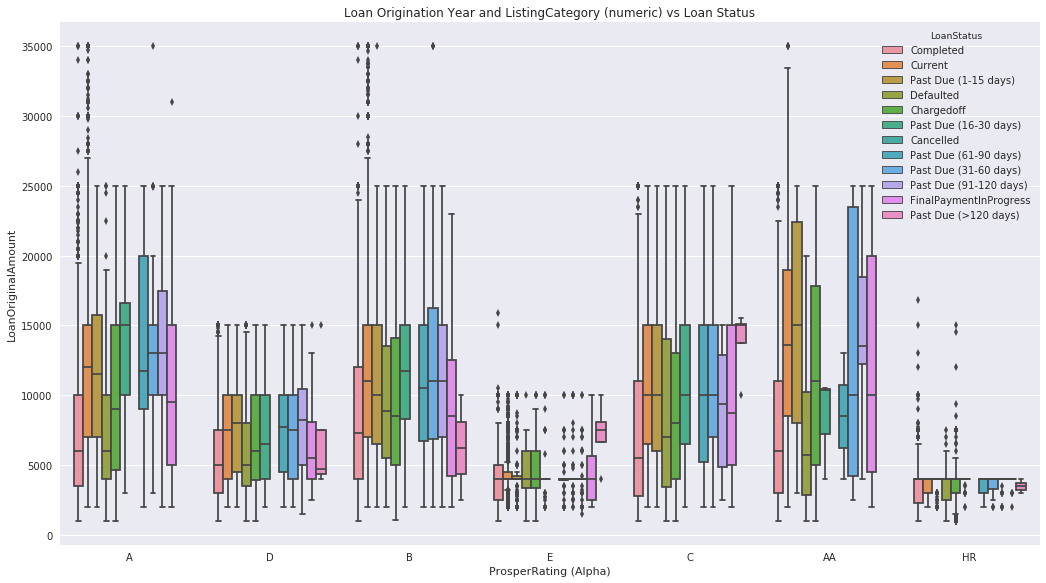

In [15]:
sb.set(rc = {'figure.figsize':(14.70,8.27)})
sb.boxplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');
plt.title('Loan Origination Year and ListingCategory (numeric) vs Loan Status');
plt.tight_layout()

In [18]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 959072 bytes to Part_II_slide_deck_template.slides.html
